In [143]:
#!pip install progressbar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classifiers import logisticRegression
import progressbar
from time import sleep
%load_ext autoreload
%autoreload 2

In [2]:
url = 'train_u6lujuX_CVtuZ9i.csv'
dataset = pd.read_csv(url)

In [81]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [83]:
dataset.loc[dataset['Dependents'] == '3+','Dependents'] = 3
pd.to_numeric(dataset['Dependents'], errors='coerce')
dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [84]:
dataset.groupby('Dependents').count()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,,,,,,,,,,,,
3,51,48,51,51,49,51,51,49,50,48,51,51
0,345,338,345,345,326,345,345,334,334,316,345,345
1,102,101,102,102,96,102,102,98,101,90,102,102
2,101,99,101,101,96,101,101,98,101,95,101,101


In [85]:
dataset.groupby('Gender')['ApplicantIncome'].mean()

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

In [86]:
dataset.groupby('Gender').describe()

ApplicantIncome                                                   \
                 count         mean          std    min     25%     50%   
Gender                                                                    
Female           112.0  4643.473214  3585.381488  210.0  2661.5  3583.0   
Male             489.0  5446.460123  6185.789262  150.0  2917.0  3865.0   

                        CoapplicantIncome               ...   LoanAmount  \
           75%      max             count         mean  ...          75%   
Gender                                                  ...                
Female  4606.5  19484.0             112.0  1108.008929  ...        138.0   
Male    5923.0  81000.0             489.0  1742.932352  ...        175.0   

              Loan_Amount_Term                                             \
          max            count        mean        std   min    25%    50%   
Gender                                                                      
Female  600.0            109.0  352.293578  56.722081  36.0  360.0  360.0   
Male    650.0            478.0  339.665272  67.089140  12.0  360.0  360.0   

                      
          75%    max  
Gender                
Female  360.0  480.0  
Male    360.0  480.0  

[2 rows x 40 columns]

In [87]:
dataset['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [88]:
dataset['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [89]:
dataset['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

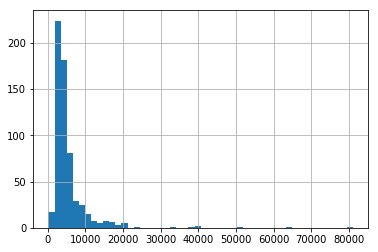

In [90]:
dataset['ApplicantIncome'].hist(bins=50)

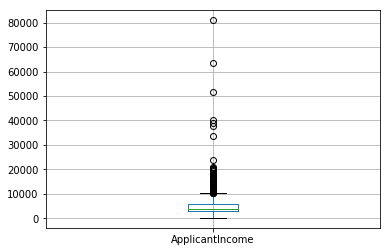

In [91]:
dataset.boxplot(column='ApplicantIncome')

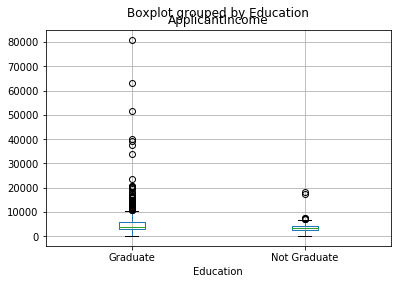

In [92]:
dataset.boxplot(column='ApplicantIncome',by='Education')

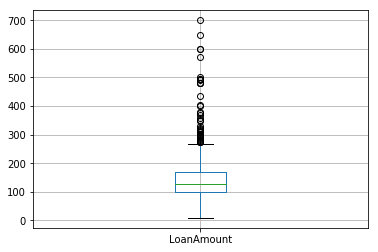

In [93]:
dataset.boxplot(column='LoanAmount')

In [94]:
temp1 = dataset['Credit_History'].value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [95]:
temp2 = dataset.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


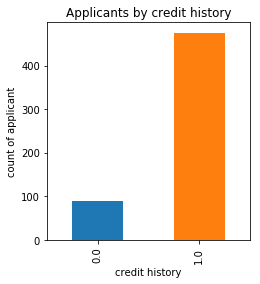

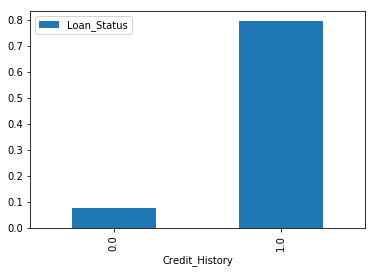

In [96]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('credit history')
ax1.set_ylabel('count of applicant')
ax1.set_title('Applicants by credit history')
temp1.plot(kind='bar')

#ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
#ax2.set_xlabel('credit history')
#ax2.set_ylabel('prob. of getting loan')
#ax2.set_title('Prob of getting loan by credit history')

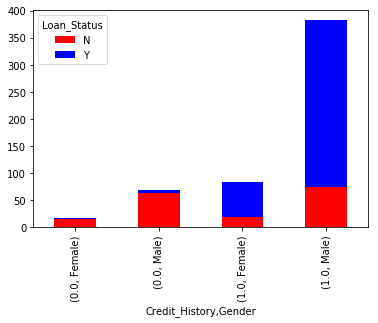

In [97]:
temp3 = pd.crosstab([dataset['Credit_History'],dataset['Gender']],dataset['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

In [98]:
dataset.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
dataset['Dependents'].fillna(0,inplace=True)
dataset['Dependents'] = dataset['Dependents'].astype(str).astype(int)
dataset['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

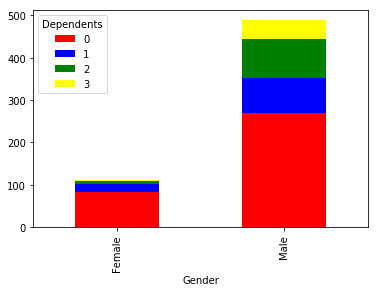

In [100]:
temp4 = pd.crosstab(dataset['Gender'],dataset['Dependents'])
temp4.plot(kind='bar',stacked=True,color=['red','blue','green','yellow'],grid=False)

In [101]:
dataset.groupby('Gender')['Dependents'].mean()

Gender
Female    0.375000
Male      0.820041
Name: Dependents, dtype: float64

In [102]:
dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [103]:
dataset.loc[(dataset['Dependents'] <= 1) & (dataset['Gender'].isnull()), 'Gender'] = 'Female'
dataset['Gender'].value_counts()

Male      489
Female    120
Name: Gender, dtype: int64

In [104]:
dataset.loc[(dataset['Dependents'] > 1) & (dataset['Gender'].isnull()), 'Gender'] = 'Male'
dataset['Gender'].value_counts()

Male      494
Female    120
Name: Gender, dtype: int64

In [105]:
dataset['Gender'].value_counts()

Male      494
Female    120
Name: Gender, dtype: int64

In [106]:
dataset.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
dataset.groupby('Gender')['Dependents'].mean()

Gender
Female    0.358333
Male      0.838057
Name: Dependents, dtype: float64

In [108]:
dataset.groupby('Married')['Dependents'].count()

Married
No     213
Yes    398
Name: Dependents, dtype: int64

In [109]:
dataset.loc[(dataset['Dependents'] == 0) & (dataset['Married'].isnull())].count()

Loan_ID              3
Gender               3
Married              0
Dependents           3
Education            3
Self_Employed        3
ApplicantIncome      3
CoapplicantIncome    3
LoanAmount           2
Loan_Amount_Term     3
Credit_History       3
Property_Area        3
Loan_Status          3
dtype: int64

In [110]:
dataset.loc[(dataset['Dependents'] == 0) & (dataset['Married'].isnull()),'Married'] = 'No'

In [111]:
dataset.groupby('Married')['Dependents'].count()

Married
No     216
Yes    398
Name: Dependents, dtype: int64

In [112]:
dataset.groupby('Self_Employed')['Self_Employed'].count()

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

In [113]:
dataset.pivot_table(values='Self_Employed',index='Education',aggfunc=lambda x : x.map({'Yes':1,'No':0}).sum())

,Self_Employed
Education,
Graduate,65.0
Not Graduate,17.0


In [114]:

dataset.groupby('Self_Employed')['ApplicantIncome'].mean()

Self_Employed
No     5049.748000
Yes    7380.817073
Name: ApplicantIncome, dtype: float64

In [115]:
dataset.loc[(dataset['Self_Employed'].isnull())].count()
dataset.loc[(dataset['Self_Employed'].isnull()),'Self_Employed'] = 'No'

In [116]:
dataset.groupby('Self_Employed')['Self_Employed'].count()

Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64

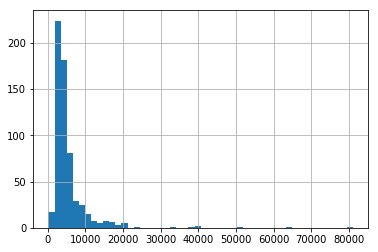

In [117]:
dataset['ApplicantIncome'].hist(bins=50)

In [118]:
dataset['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

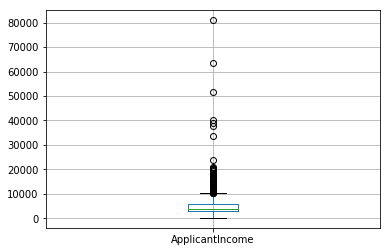

In [119]:
dataset.boxplot(column='ApplicantIncome')

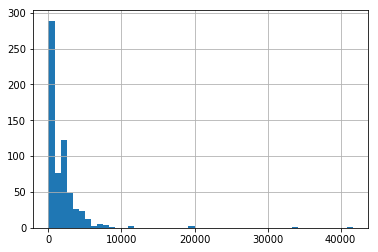

In [120]:
dataset['CoapplicantIncome'].hist(bins=50)

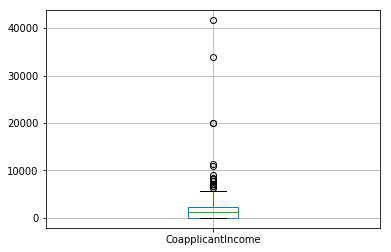

In [121]:
dataset.boxplot(column='CoapplicantIncome')

In [122]:
dataset['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [123]:
dataset['total_income'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

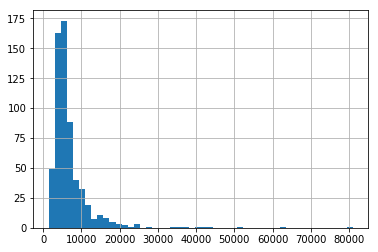

In [124]:
dataset['total_income'].hist(bins=50)

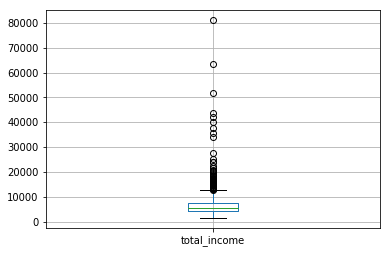

In [125]:
dataset.boxplot(column='total_income')

In [126]:
dataset['total_income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: total_income, dtype: float64

In [127]:
dataset['total_income_log'] = dataset['total_income'].transform(lambda x : np.log(x))

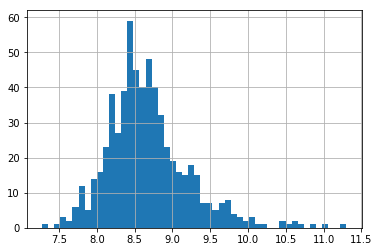

In [128]:
dataset['total_income_log'].hist(bins=50)

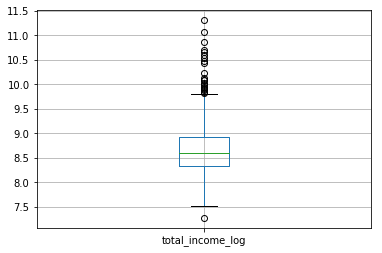

In [129]:
dataset.boxplot(column='total_income_log')

In [130]:
dataset['total_income_log'].describe()

count    614.000000
mean       8.669414
std        0.545102
min        7.273786
25%        8.334712
50%        8.597205
75%        8.925549
max       11.302204
Name: total_income_log, dtype: float64

In [131]:
dataset.pivot_table(values='Loan_Status',index='Property_Area',aggfunc=lambda x:x.map({'Y':1,'N':0}).sum())

,Loan_Status
Property_Area,
Rural,110
Semiurban,179
Urban,133


In [132]:
train_set = dataset[['Married','Education','Self_Employed','total_income_log','Credit_History','Property_Area','Loan_Status']].copy()
train_set.head(20)

,Married,Education,Self_Employed,total_income_log,Credit_History,Property_Area,Loan_Status
0,No,Graduate,No,8.674026,1.0,Urban,Y
1,Yes,Graduate,No,8.714568,1.0,Rural,N
2,Yes,Graduate,Yes,8.006368,1.0,Urban,Y
3,Yes,Not Graduate,No,8.505323,1.0,Urban,Y
4,No,Graduate,No,8.699515,1.0,Urban,Y
5,Yes,Graduate,Yes,9.170872,1.0,Urban,Y
6,Yes,Not Graduate,No,8.255569,1.0,Urban,Y
7,Yes,Graduate,No,8.619750,0.0,Semiurban,N
8,Yes,Graduate,No,8.618305,1.0,Urban,Y
9,Yes,Graduate,No,10.077819,1.0,Semiurban,N


In [133]:
train_set['Married'] = train_set['Married'].map({'Yes':1,'No':0})
train_set['Education'] = train_set['Education'].map({'Graduate':1,'Not Graduate':0})
train_set['Self_Employed'] = train_set['Self_Employed'].map({'Yes':1,'No':0})
#train_set['Property_Area'] = train_set['Property_Area'].map({'Rural':1,'Semiurban':2,'Urban':3})
train_set['Loan_Status'] = train_set['Loan_Status'].map({'Y':1,'N':0})
train_set.head(20)

,Married,Education,Self_Employed,total_income_log,Credit_History,Property_Area,Loan_Status
0,0,1,0,8.674026,1.0,Urban,1
1,1,1,0,8.714568,1.0,Rural,0
2,1,1,1,8.006368,1.0,Urban,1
3,1,0,0,8.505323,1.0,Urban,1
4,0,1,0,8.699515,1.0,Urban,1
5,1,1,1,9.170872,1.0,Urban,1
6,1,0,0,8.255569,1.0,Urban,1
7,1,1,0,8.619750,0.0,Semiurban,0
8,1,1,0,8.618305,1.0,Urban,1
9,1,1,0,10.077819,1.0,Semiurban,0


In [134]:
train_set.shape

(614, 7)

In [135]:
train_set.apply(lambda x:np.sum(x.isnull(),axis=0))

Married              0
Education            0
Self_Employed        0
total_income_log     0
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [136]:
train_set = train_set.dropna(subset=['Credit_History'])
train_set.shape

(564, 7)

In [137]:
min_income = train_set['total_income_log'].min()
max_income = train_set['total_income_log'].max()
#print('max_income',max_income)
train_set['total_income_log'] = (train_set['total_income_log'] - min_income)/(max_income - min_income)
train_set.head(20)

,Married,Education,Self_Employed,total_income_log,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.347590,1.0,Urban,1
1,1,1,0,0.357654,1.0,Rural,0
2,1,1,1,0.181853,1.0,Urban,1
3,1,0,0,0.305712,1.0,Urban,1
4,0,1,0,0.353918,1.0,Urban,1
5,1,1,1,0.470926,1.0,Urban,1
6,1,0,0,0.243714,1.0,Urban,1
7,1,1,0,0.334117,0.0,Semiurban,0
8,1,1,0,0.333758,1.0,Urban,1
9,1,1,0,0.696063,1.0,Semiurban,0


In [138]:
prop_dummy = pd.get_dummies(train_set['Property_Area'])
train_set = pd.concat([train_set,prop_dummy],axis=1)
train_set.head(20)

,Married,Education,Self_Employed,total_income_log,Credit_History,Property_Area,Loan_Status,Rural,Semiurban,Urban
0,0,1,0,0.347590,1.0,Urban,1,0,0,1
1,1,1,0,0.357654,1.0,Rural,0,1,0,0
2,1,1,1,0.181853,1.0,Urban,1,0,0,1
3,1,0,0,0.305712,1.0,Urban,1,0,0,1
4,0,1,0,0.353918,1.0,Urban,1,0,0,1
5,1,1,1,0.470926,1.0,Urban,1,0,0,1
6,1,0,0,0.243714,1.0,Urban,1,0,0,1
7,1,1,0,0.334117,0.0,Semiurban,0,0,1,0
8,1,1,0,0.333758,1.0,Urban,1,0,0,1
9,1,1,0,0.696063,1.0,Semiurban,0,0,1,0


In [139]:
train_set = train_set[['Married','Education','Self_Employed','total_income_log','Credit_History','Rural','Semiurban','Urban','Loan_Status']]
train_set.head(20)

,Married,Education,Self_Employed,total_income_log,Credit_History,Rural,Semiurban,Urban,Loan_Status
0,0,1,0,0.347590,1.0,0,0,1,1
1,1,1,0,0.357654,1.0,1,0,0,0
2,1,1,1,0.181853,1.0,0,0,1,1
3,1,0,0,0.305712,1.0,0,0,1,1
4,0,1,0,0.353918,1.0,0,0,1,1
5,1,1,1,0.470926,1.0,0,0,1,1
6,1,0,0,0.243714,1.0,0,0,1,1
7,1,1,0,0.334117,0.0,0,1,0,0
8,1,1,0,0.333758,1.0,0,0,1,1
9,1,1,0,0.696063,1.0,0,1,0,0


In [140]:
train_set.apply(lambda x:np.sum(x.isnull(),axis=0))

Married             0
Education           0
Self_Employed       0
total_income_log    0
Credit_History      0
Rural               0
Semiurban           0
Urban               0
Loan_Status         0
dtype: int64

In [141]:
lg = logisticRegression()

training for lr: 0.0
Progress: |██████████████████████████████████████████████████| 100.0% Complete
For lr: 0.0  training auc: 0.5  validation auc: 0.5
training for lr: 0.01
Progress: |██████████████████████████████████████████████████| 100.0% Complete
For lr: 0.01  training auc: 0.8180253547141298  validation auc: 0.8795698924731183
training for lr: 0.1
Progress: |██████████████████████████████████████████████████| 100.0% Complete
For lr: 0.1  training auc: 0.8243962969159556  validation auc: 0.8978494623655914


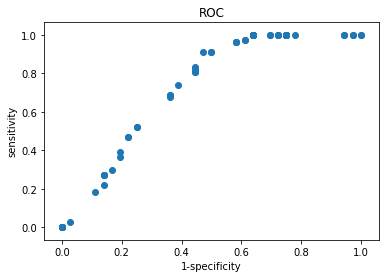

highest test auc: 0.7292568542568542  acheived for lr: 0.1


In [142]:
num_iter = 10000
learning_rate = np.array((0.0,0.01,0.1))
verbose = False
print_every = 1000
test_size = 0.2
kfold = 10
train_ds,test_ds = train_test_split(train_set,test_size = test_size)
test_arr = test_ds.values
test_x = np.hstack((np.ones((test_arr.shape[0],1)),test_arr[:,0:-1]))
test_y = test_arr[:,-1]
best_w = []
best_auc = 0.0
best_lr = 0.0
for lr in learning_rate:
    print('training for lr:',lr)
    w,auc = lg.fit(train_ds,num_iter,kfold,lr,print_every,verbose)
    if auc > best_auc:
        best_auc = auc
        best_w = w
        best_lr = lr
test_auc = lg.score(test_x,test_y,w,show_cm=True)
print('highest test auc:',test_auc,' acheived for lr:',best_lr)
#print('best w:',best_w)